In [1]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import numpy as np
import h5py
#from chainconsumer import ChainConsumer
from corner import corner

In [3]:
fname = '/u/ki/swmclau2/des/PearceMCMC/HOD_wp_rmin_None_HOD.hdf5'

In [4]:
f = h5py.File(fname, 'r')

In [5]:
f.attrs.keys()

[u'chain_fixed_params',
 u'cov',
 u'dlogz',
 u'emu_cov_fname',
 u'emu_hps',
 u'emu_type',
 u'fixed_params',
 u'mcmc_type',
 u'nburn',
 u'nlive',
 u'nsteps',
 u'nwalkers',
 u'obs',
 u'param_names',
 u'seed',
 u'sim',
 u'training_file']

In [6]:
from ast import literal_eval

In [7]:
from pearce.emulator import NashvilleHot
tf = f.attrs['training_file']
fixed_params = literal_eval(f.attrs['fixed_params'])
emu_hps = literal_eval(f.attrs['emu_hps'])

In [11]:
try:
    del fixed_params['rmin'] # don't want this rn
except KeyError:
    pass

In [12]:
emu = NashvilleHot(tf, fixed_params = fixed_params, hyperparams = emu_hps)

 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2043: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2044: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2043: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2044: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2043: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2044: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local

(array([], dtype=int64), array([], dtype=int64))


In [13]:
chain_pnames = f.attrs['param_names']

In [14]:
n_walkers = f.attrs['nwalkers']

In [15]:
sim_info = literal_eval(f.attrs['sim'])

In [16]:
chain = f['chain'][()]#[n_walkers*1000:n_walkers*6000]

In [17]:
n_params = chain.shape[1] if len(chain.shape) > 1 else 1

In [18]:
n_burn = 0
chain = chain[n_walkers*n_burn:]#, :]

In [19]:
chain = chain[np.all(chain!=0.0, axis = 1), :]

In [20]:
print chain.shape, chain.shape[0]/n_walkers

(1273600, 12) 6368


In [21]:
MAP = chain.mean(axis = 0)
print MAP

[ 2.2416437e-02  1.1910657e-01 -8.4586519e-01  9.5704019e-01
  3.0980279e+00  6.4217972e+01  3.3058488e+00  1.4084832e+01
  1.3154937e+01  2.0298243e-01  1.1032306e+00  8.6153573e-01]


In [22]:
MAP_dict = dict(zip(emu.get_param_names(), MAP))

In [23]:
MAP_dict

{'H0': 64.21797,
 'Neff': 3.3058488,
 'alpha': 1.1032306,
 'conc_gal_bias': 0.8615357,
 'ln10As': 3.098028,
 'logM0': 13.154937,
 'logM1': 14.084832,
 'ns': 0.9570402,
 'ombh2': 0.022416437,
 'omch2': 0.11910657,
 'sigma_logM': 0.20298243,
 'w0': -0.8458652}

In [24]:
MAP_pred = emu.emulate_wrt_r(MAP_dict)[0]

In [25]:
param_names = [r'$\Omega_b h^2$', r'$\Omega_c h^2$', r'$w_0$', r'$n_s$', r'$\ln(10A_s)$', r'$H_0$', r'$N_{eff}$',\
               r'$\log(M_0)$', r'$\sigma_{\log M }$',r'$\log(M_1)$',r'$\alpha$']
               # r'$\rho_{sat}$',r'$\rho_{cen}$', r'$\log(M_1)$',r'$\log(M_0)$', r'$\sigma_{\log M }$',r'$\alpha$' ]

In [26]:
hod_param_names = [r'$\log(M_0)$',r'$\sigma_{\log M }$',r'$\log(M_1)$' ,r'$\alpha$' ]
cosmo_param_names = [r'$\Omega_b h^2$', r'$\Omega_c h^2$', r'$w_0$', r'$n_s$', r'$\ln(10A_s)$', r'$H_0$', r'$N_{eff}$' ]

In [27]:
hod_idxs = np.array(range(len(cosmo_param_names), len(cosmo_param_names)+len(hod_param_names)))
cosmo_idxs = np.array(range(len(cosmo_param_names)))

In [28]:
if chain.shape[1] == 7:
    cosmo_chain = chain
else:
    hod_chain = chain[:,-4:]#[:, hod_idxs]
    cosmo_chain = chain[:,:-4]#[:, cosmo_idxs]

In [29]:
from pearce.mocks import cat_dict
cosmo_params = {'simname': sim_info['simname'], 
                #'boxno': sim_info['sim_hps']['boxno'],\
                #'realization': sim_info['sim_hps']['realization'], 
                'scale_factors':[sim_info['scale_factor']],\
                'system': sim_info['sim_hps']['system']}


In [30]:
cosmo_params

{'scale_factors': [1.0], 'simname': 'testbox', 'system': 'ki-ls'}

In [31]:
cosmo_params['boxno'] = 1
cosmo_params['realization'] = 0

In [32]:
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [33]:
cpv = cat._get_cosmo_param_names_vals()

cat_val_dict =  {key: val for key, val in zip(cpv[0], cpv[1])}

In [34]:
#cosmo_true_vals = [3.7,70.7317,-1.13151,0.12283, 3.11395,  0.953515,  0.021762]
cosmo_true_vals = [cat_val_dict[pn] for pn in chain_pnames if pn in cat_val_dict]
#cosmo_true_vals = [0.046*0.7**2, (0.27-0.046)*0.7**2, -1, 0.95, 3.5698, 70, 3.04] 

#cosmo_true_vals = [MAP[idx] for idx, pn in enumerate(chain_pnames) if pn in cat_val_dict]

In [35]:
import yaml
with open('/u/ki/swmclau2/Git/pearce/bin/mcmc/config/HOD_wp_ds_rmin_1.0_HOD.yaml') as yamlfile:
    cfg = yaml.load(yamlfile)
    sim_cfg = cfg['data']['sim']
    obs_cfg = cfg['data']['obs']

In [36]:
r_bins = obs_cfg['rbins']

In [37]:
true_data = f['data']#[len(r_bins)-1:]
#true_data = f['data'][:len(r_bins)-1]

In [38]:
true_data

<HDF5 dataset "data": shape (18,), type "<f8">

In [39]:
rbc = emu.scale_bin_centers#[-len(emu.scale_bin_centers):]

In [40]:
cov = f['cov']#[len(r_bins)-1:][:, len(r_bins)-1:]
#cov = f['cov'][:len(r_bins)-1][:, :len(r_bins)-1]

yerr = np.sqrt(np.diag(cov))

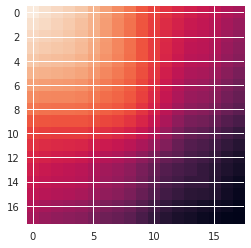

In [41]:
plt.imshow(np.log10(cov) )

In [42]:
np.sqrt(np.diag(cov))

array([468.99487291, 351.9563854 , 287.78190438, 242.37446997,
       185.25882201, 122.51497526,  83.26966189,  62.38432576,
        43.27522003,  25.74135741,  14.08369649,   6.84448356,
         3.97664341,   2.61926921,   2.12991014,   1.57264414,
         1.07639795,   0.86716334])

In [44]:
bounds = {pname: emu.get_param_bounds(pname) for pname in emu.get_param_names()[:-4]}

In [45]:
bounds

{'H0': (61.69472, 74.76751999999999),
 'Neff': (2.62125, 4.27875),
 'ln10As': (3.0009, 3.179424),
 'logM1': (13.7, 14.7),
 'ns': (0.9278462, 0.9974495999999999),
 'ombh2': (0.02066455, 0.02371239),
 'omch2': (0.1012181, 0.13177679999999997),
 'w0': (-1.399921, -0.5658486)}

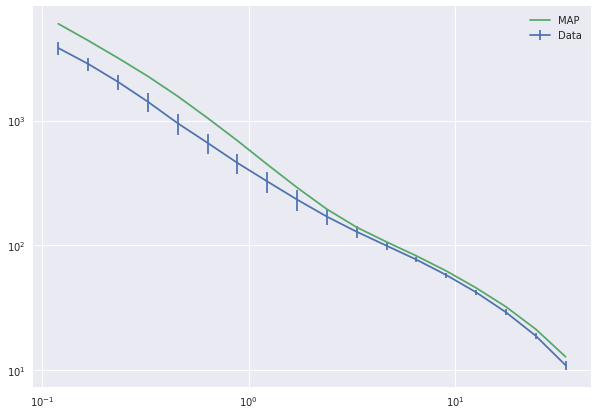

In [46]:
fig = plt.figure(figsize = (10,7))
plt.errorbar(rbc, true_data[-len(emu.scale_bin_centers):], yerr=yerr, label = 'Data')
#plt.plot(rbc, 10**true_pred, label = 'True')
plt.plot(rbc, 10**MAP_pred, label = 'MAP')
#plt.plot(rbc, 10**pop_xi.mean(axis = 0), label = 'Pop')#, lw = 5)

plt.loglog()
plt.legend(loc='best')
plt.show();

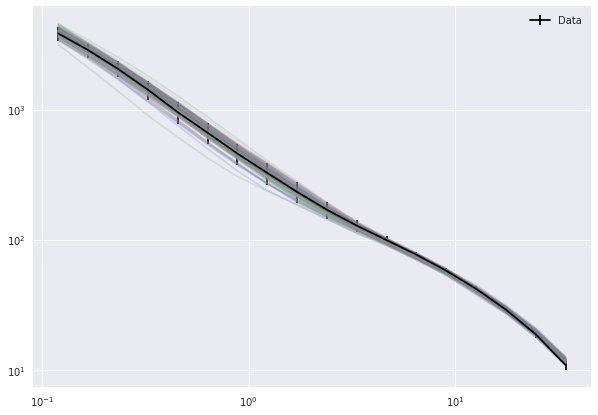

In [47]:
fig = plt.figure(figsize = (10,7))
chain_samples = np.random.choice(chain.shape[0], size = 100, replace = False)
for sample in chain[chain_samples]:
    param_dict = dict(zip(emu.get_param_names(), sample))
    plt.plot(rbc, 10**emu.emulate_wrt_r(param_dict)[0], alpha = 0.2)
plt.errorbar(rbc, true_data[-len(emu.scale_bin_centers):], yerr=yerr, label = 'Data', color = 'k')
#plt.plot(rbc, 10**true_pred, label = 'True')
#plt.plot(rbc, 10**MAP_pred, label = 'MAP')
#plt.plot(rbc, 10**pop_xi.mean(axis = 0), label = 'Pop')#, lw = 5)

plt.loglog()
plt.legend(loc='best')
plt.show();

 /u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning:No labelled objects found. Use label='...' kwarg on individual plots.


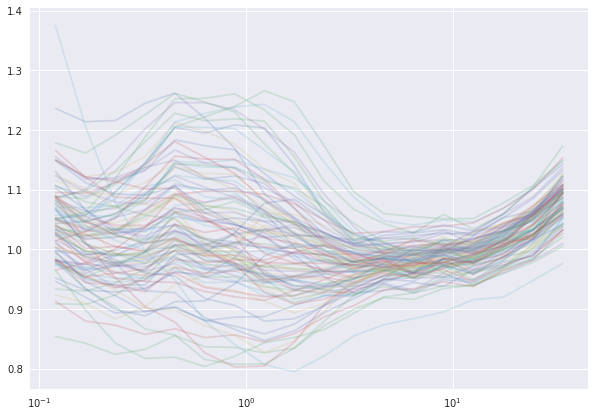

In [48]:
fig = plt.figure(figsize = (10,7))
chain_samples = np.random.choice(chain.shape[0], size = 100, replace = False)
for sample in chain[chain_samples]:
    param_dict = dict(zip(emu.get_param_names(), sample))
    plt.plot(rbc, 10**emu.emulate_wrt_r(param_dict)[0]/true_data[-len(emu.scale_bin_centers):], alpha = 0.2)
#plt.errorbar(rbc, np.ones(len(emu.scale_bin_centers)), yerr=yerr/true_data[-len(emu.scale_bin_centers):], label = 'Data')
#plt.plot(rbc, 10**true_pred, label = 'True')
#plt.plot(rbc, 10**MAP_pred, label = 'MAP')
#plt.plot(rbc, 10**pop_xi.mean(axis = 0), label = 'Pop')#, lw = 5)
plt.xscale('log')
#plt.loglog()
plt.legend(loc='best')
plt.show();

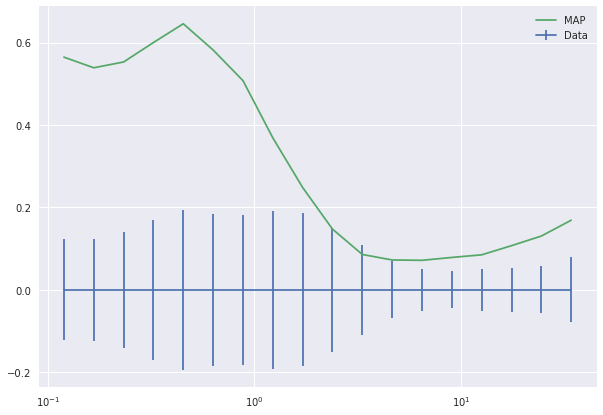

In [49]:
fig = plt.figure(figsize = (10,7))
plt.errorbar(rbc, np.zeros_like(true_data[-len(emu.scale_bin_centers):]), yerr=yerr/true_data[-len(emu.scale_bin_centers):], label = 'Data')
#plt.plot(rbc, (10**true_pred-true_data[-len(emu.scale_bin_centers):])/true_data[-len(emu.scale_bin_centers):], label = 'True')
plt.plot(rbc, (10**MAP_pred-true_data[-len(emu.scale_bin_centers):])/true_data[-len(emu.scale_bin_centers):], label = 'MAP')
plt.xscale('log')
plt.legend(loc='best')
plt.show();

In [50]:
emu.get_param_names()

['ombh2',
 'omch2',
 'w0',
 'ns',
 'ln10As',
 'H0',
 'Neff',
 'logM1',
 'logM0',
 'sigma_logM',
 'alpha',
 'conc_gal_bias']

In [51]:
true_param_dict = param_dict.copy()

In [52]:
true_param_dict

{'H0': 63.30243,
 'Neff': 3.3644428,
 'alpha': 1.0926445,
 'conc_gal_bias': 1.0765771,
 'ln10As': 3.1124918,
 'logM0': 13.368906,
 'logM1': 14.191378,
 'ns': 0.94252604,
 'ombh2': 0.023197873,
 'omch2': 0.123018846,
 'sigma_logM': 0.08095523,
 'w0': -0.7833013}

In [101]:
N = 250
cmap = sns.color_palette("BrBG_d", N)

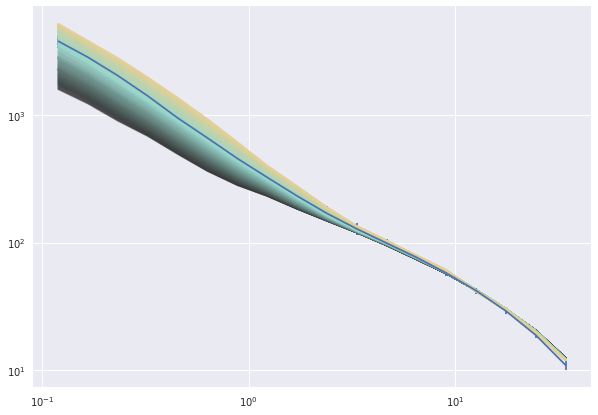

In [102]:
fig = plt.figure(figsize=(10,7))
varied_pname = 'omch2'
lower, upper = emu.get_param_bounds(varied_pname)
#lower, upper = 0.11, 0.12
#for c, val in zip(cmap, np.linspace(lower, upper, N) ):
#    param_dict = true_param_dict.copy()
#    #param_dict = MAP_dict.copy()

#    param_dict[varied_pname] = val
#    pred = emu.emulate_wrt_r(param_dict)[0]
#    plt.plot(rbc, 10**pred, alpha = 0.5,label = val, color =c)
    
plt.errorbar(rbc, true_data, yerr=yerr, label = 'Data')
plt.loglog()
#plt.legend(loc='best')
plt.show();

In [103]:
yerr/true_data

array([0.12254092, 0.12324704, 0.14043135, 0.17062657, 0.19395378,
       0.18432087, 0.18133449, 0.19115452, 0.18548466, 0.15120653,
       0.10936186, 0.06879131, 0.05167641, 0.04522363, 0.05058709,
       0.05399012, 0.05711798, 0.0792013 ])

In [162]:
cosmo_params = emu.x1*emu._x1_std + emu._x1_mean

sim_vals = cosmo_params[:, emu.get_param_names().index(varied_pname)]

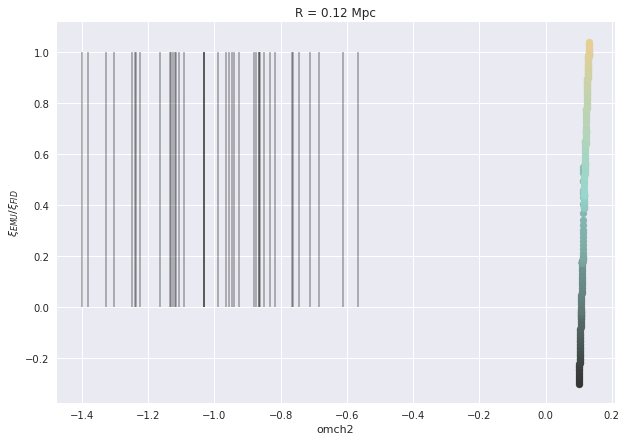

In [215]:
fig = plt.figure(figsize=(10,7))
#varied_pname = 'Neff'
#lower, upper = emu.get_param_bounds(varied_pname)
varied_pname = 'omch2'
lower, upper = emu.get_param_bounds(varied_pname)
i = 0
rbin = 0
for c, val in zip(cmap, np.linspace(lower, upper, N) ):
    #print i, val
    i+=1
    #param_dict = true_param_dict.copy()
    param_dict = MAP_dict.copy()
    param_dict[varied_pname] = val
    pred = emu.emulate_wrt_r(param_dict)[0][rbin]
    plt.scatter(val, (10**pred-true_data[rbin])/true_data[rbin], color =c)
    #plt.scatter(val, pred, label = val, color =c)

#plt.errorbar(rbc, np.zeros_like(true_data[-len(emu.scale_bin_centers):]), yerr=yerr/true_data[-len(emu.scale_bin_centers):], label = 'Data')
#plt.loglog()
##plt.xscale('log')
#plt.legend(loc='best')
plt.vlines(sim_vals, 0.0, 1.0, alpha = 0.3)#, label = 'Boxes')
plt.xlabel(varied_pname)
plt.ylabel(r'$\xi_{EMU}/\xi_{FID}$')
plt.title('R = %.2f Mpc'%emu.scale_bin_centers[rbin])
plt.show();

In [160]:
emu.get_param_names()

['ombh2',
 'omch2',
 'w0',
 'ns',
 'ln10As',
 'H0',
 'Neff',
 'logM1',
 'logM0',
 'sigma_logM',
 'alpha',
 'conc_gal_bias']

In [161]:
cosmo_params[0, :]

array([ 2.26832494e-02,  1.14059801e-01, -8.16597201e-01,  9.75588999e-01,
        3.09291800e+00,  6.33656900e+01,  2.91875000e+00])

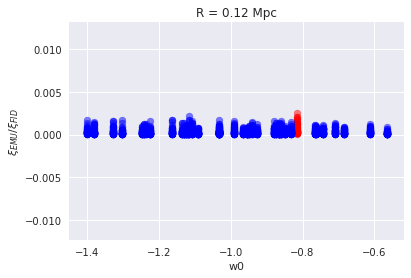

In [164]:
for cosmo_idx, oc in enumerate(sim_vals):
    for hod_idx in np.random.choice(1000, size = 50, replace = False):
        if cosmo_idx == 0:
            color = 'r'
        else:
            color = 'b'
        plt.scatter(oc, (10**emu.y[rbin, cosmo_idx, hod_idx])/true_data[rbin], color = color, alpha = 0.5)
plt.title('R = %.2f Mpc'%emu.scale_bin_centers[rbin])
plt.ylabel(r'$\xi_{EMU}/\xi_{FID}$')

#plt.ylim([-0.001, 0.004])
plt.xlabel(varied_pname)

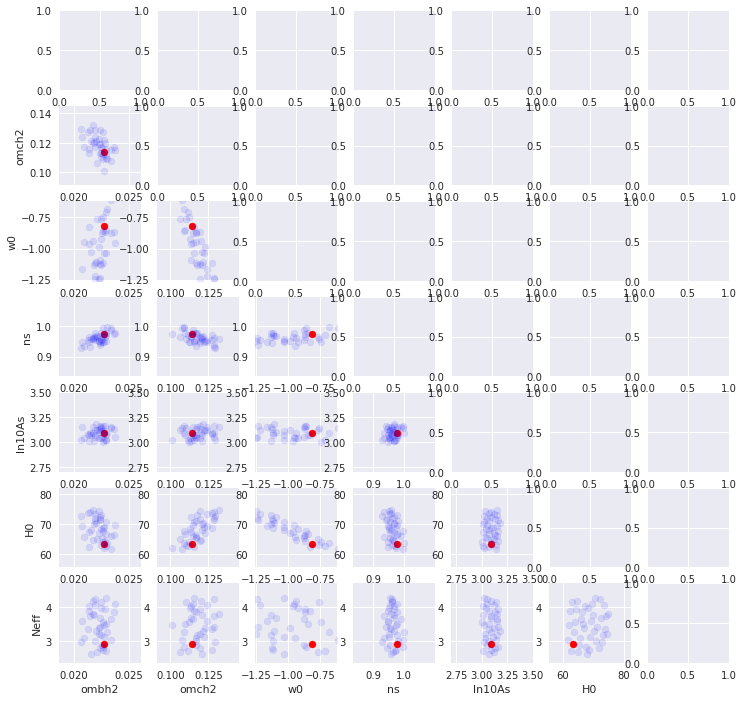

In [191]:
f , axes = plt.subplots(7,7, figsize = (12,12))
pnames = emu.get_param_names()
for i in xrange(7):
    for j in xrange(i):
        axes[i,j].scatter(cosmo_params[0, j], cosmo_params[0, i], color = 'r')
        axes[i,j].scatter(cosmo_params[1:, j], cosmo_params[1:, i], color = 'b', alpha = 0.1)
        axes[i,j].set_xlim([np.min(cosmo_params[:,j])*0.9, np.max(cosmo_params[:,j])*1.1])
        axes[i,j].set_ylim([np.min(cosmo_params[:,i])*0.9, np.max(cosmo_params[:,i])*1.1])
        
        if i == 6:
            axes[i,j].set_xlabel(pnames[j])
        else:
            #axes[i,j].get_xaxis().set_ticks([])
            pass

        if j == 0:
            axes[i,j].set_ylabel(pnames[i])
        else:
            #axes[i,j].get_yaxis().set_ticks([])
            pass


In [192]:
from pearce.mocks.kittens import TrainingBox

In [211]:
cat = TrainingBox(0, system = 'ki-ls')

In [212]:
cat.load(1.0, HOD='zheng07')

 /u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/sim_manager/cached_halo_catalog.py:567: H5pyDeprecationWarning:The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


In [214]:
cat.halocat.halo_table.colnames

['halo_upid',
 'halo_vx',
 'halo_y',
 'halo_x',
 'halo_z',
 'halo_vy',
 'halo_vz',
 'halo_rs',
 'halo_rvir',
 'halo_mvir',
 'halo_id',
 'halo_nfw_conc',
 'halo_hostid',
 'halo_local_density_1',
 'halo_local_density_5',
 'halo_local_density_10',
 'halo_mvir_host_halo']

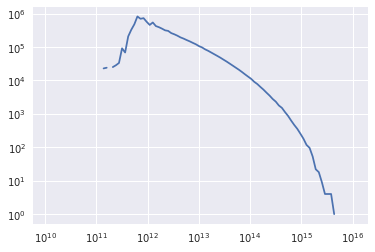

In [208]:
plt.plot(mass_bins[1:], mass_func);
plt.loglog();

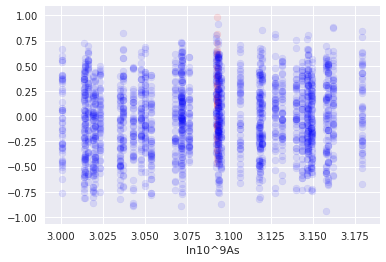

In [152]:
for cosmo_idx, oc in enumerate(lnas_vals):
    for hod_idx in np.random.choice(1000, size = 50, replace = False):
        if cosmo_idx == 0:
            color = 'r'
        else:
            color = 'b'
        plt.scatter(oc, emu.y[rbin, cosmo_idx, hod_idx], color = color, alpha = 0.1)
    
plt.xlabel('ln10^9As')

In [114]:
?? plt.vlines

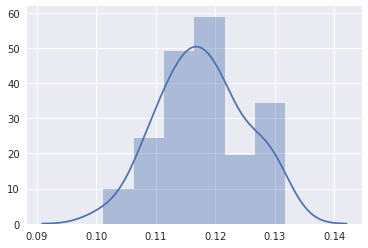

In [113]:
sns.distplot(omch2_vals)

In [120]:
omch2_vals

array([0.1140598, 0.1172576, 0.1087487, 0.1123064, 0.1062517, 0.1295035,
       0.1115033, 0.1195969, 0.1238351, 0.1158135, 0.1289506, 0.1089506,
       0.1167658, 0.1171763, 0.127108 , 0.1285016, 0.1206762, 0.1194239,
       0.1157403, 0.1132626, 0.122488 , 0.117169 , 0.121009 , 0.1012181,
       0.1102766, 0.1170569, 0.1191811, 0.1134255, 0.1317768, 0.1289151,
       0.1239137, 0.1275787, 0.112845 , 0.1149703, 0.1222293, 0.1076406,
       0.1212967, 0.109744 , 0.1149747, 0.12007  ])

In [57]:
bin = 17
#emu._kernels[bin][0].linear.variances

In [58]:
emu._kernels[bin][0].rbf.lengthscale

index,KGPR.sum.rbf.lengthscale,constraints,priors
[0],91.32239928,+ve,
[1],5.00735615,+ve,
[2],13.75117438,+ve,
[3],90.61906224,+ve,
[4],18.58050472,+ve,
[5],11.73773281,+ve,
[6],11.18544714,+ve,


In [59]:
x = emu._x1_std*emu.x1+emu._x1_mean

In [60]:
emu.get_param_names()

['ombh2',
 'omch2',
 'w0',
 'ns',
 'ln10As',
 'H0',
 'Neff',
 'logM1',
 'logM0',
 'sigma_logM',
 'alpha',
 'conc_gal_bias']

In [61]:
np.argmin(abs(x[:,1]- 0.11386))

0

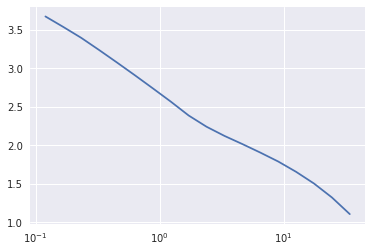

In [62]:
plt.plot(emu.scale_bin_centers, emu.y[:, 4, 100]+emu._y_mean)
plt.xscale('log')

In [63]:
param_dict = dict(zip(emu.get_param_names(), np.hstack([emu.x1[4]*emu._x1_std+emu._x1_mean,\
                                                        emu.x2[100]*emu._x2_std+emu._x2_mean])))

In [64]:
param_dict

{'H0': 65.04913000082212,
 'Neff': 2.6637500016026476,
 'alpha': 0.9024024029653193,
 'conc_gal_bias': 0.9954954960826611,
 'ln10As': 3.118564999410984,
 'logM0': 13.33873873791255,
 'logM1': 13.978278279045577,
 'ns': 0.9650927998438033,
 'ombh2': 0.022084550241572666,
 'omch2': 0.1062517016356929,
 'sigma_logM': 0.1617117125829337,
 'w0': -0.766605101101712}

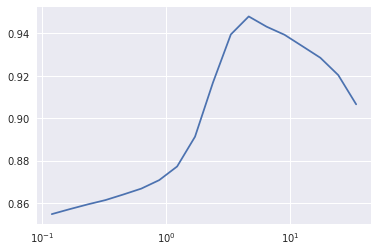

In [65]:
data = emu.y[:, 0, 0]+emu._y_mean
#plt.plot(emu.scale_bin_centers, )
plt.plot(emu.scale_bin_centers, emu.emulate_wrt_r(param_dict)[0]/data)
plt.xscale('log')